In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier

In [2]:
# Raw Data Loading
iris = load_iris()

# DataFrame으로 변환해서 처리하는게 쉽고 편해요!
df = pd.DataFrame(iris.data,
                  columns=iris.feature_names)

df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

df['target'] = iris.target
# display(df)

# 결측치와 이상치는 없다고 가정하고 진행!
# 중복데이터 처리
df = df.drop_duplicates()

# 이제 x_data와 t_data를 추출하면 될 거 같아요!
# x_data는 4개의 feature
x_data = df.drop(['target'],
                 axis=1,
                 inplace=False).values
t_data = df['target'].values

# 데이터 분리보다 정규화를 먼저 진행하는게 조금 더 편해요!
scaler = MinMaxScaler()
scaler.fit(x_data)
x_data_norm = scaler.transform(x_data)

# 데이터 분리
x_data_train_norm, x_data_test_norm, t_data_train, t_data_test = \
train_test_split(x_data_norm,
                 t_data,
                 test_size=0.3,
                 stratify=t_data,
                 random_state=0)

In [3]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_data_train_norm,t_data_train)
knn_acc = accuracy_score(t_data_test,knn.predict(x_data_test_norm))
print(f'knn 정확도 : {knn_acc}')

svm = SVC(kernel='linear',C = 0.5,probability=True)
svm.fit(x_data_train_norm,t_data_train)
svm_acc = accuracy_score(t_data_test,svm.predict(x_data_test_norm))
print(f'svm 정확도 : {svm_acc}')

tree = DecisionTreeClassifier()
tree.fit(x_data_train_norm,t_data_train)
tree_acc = accuracy_score(t_data_test,tree.predict(x_data_test_norm))
print(f'결정트리 정확도 : {tree_acc}')


knn 정확도 : 0.9777777777777777
svm 정확도 : 0.9777777777777777
결정트리 정확도 : 0.9777777777777777


In [4]:
#앙상블 모델만들기
# hard voting classifier(hvc)

hvc = VotingClassifier(estimators=[('KNN',knn),
                                   ('SVM',svm),
                                   ('DT',tree)],
                                   voting='hard')
hvc.fit(x_data_train_norm,t_data_train)
hvc_acc = accuracy_score(t_data_test, hvc.predict(x_data_test_norm))
print(f'앙상블 모델(hard voting)의 accuracy : {hvc_acc}')  # 0.93

앙상블 모델(hard voting)의 accuracy : 0.9777777777777777


In [5]:
hvc = VotingClassifier(estimators=[('KNN',knn),
                                   ('SVM',svm),
                                   ('DT',tree)],
                                   voting='soft')
hvc.fit(x_data_train_norm,t_data_train)
hvc_acc = accuracy_score(t_data_test, hvc.predict(x_data_test_norm))
print(f'앙상블 모델(hard voting)의 accuracy : {hvc_acc}') 

앙상블 모델(hard voting)의 accuracy : 0.9777777777777777


In [6]:
#bagging
# 앙상블 Bagging을 구현해 보아요!
# Decision Tree를 모아서 만든 Random Forest를 구현해 보아요!

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Raw Data Loading
iris = load_iris()

# DataFrame으로 변환해서 처리하는게 쉽고 편해요!
df = pd.DataFrame(iris.data,
                  columns=iris.feature_names)

df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

df['target'] = iris.target
# display(df)

# 결측치와 이상치는 없다고 가정하고 진행!
# 중복데이터 처리
df = df.drop_duplicates()

# 이제 x_data와 t_data를 추출하면 될 거 같아요!
# x_data는 4개의 feature
x_data = df.drop(['target'],
                 axis=1,
                 inplace=False).values
t_data = df['target'].values

# 데이터 분리보다 정규화를 먼저 진행하는게 조금 더 편해요!
scaler = MinMaxScaler()
scaler.fit(x_data)
x_data_norm = scaler.transform(x_data)

# 데이터 분리
x_data_train_norm, x_data_test_norm, t_data_train, t_data_test = \
train_test_split(x_data_norm,
                 t_data,
                 test_size=0.3,
                 stratify=t_data,
                 random_state=0)

dt = DecisionTreeClassifier()
dt.fit(x_data_train_norm, t_data_train)
dt_acc = accuracy_score(t_data_test, dt.predict(x_data_test_norm))
print(f'Decision Tree 모델의 accuracy : {dt_acc}')  # 0.97

rfc = RandomForestClassifier(n_estimators=50,
                             max_depth = 3,
                             random_state=20)
rfc.fit(x_data_train_norm, t_data_train)
rfc_acc = accuracy_score(t_data_test, rfc.predict(x_data_test_norm))
print(f'Decision Tree 모델의 accuracy : {rfc_acc}')

Decision Tree 모델의 accuracy : 0.9555555555555556
Decision Tree 모델의 accuracy : 1.0


In [8]:
# Boosting
from xgboost import XGBClassifier

xgb = XGBClassifier(n_estimators = 50,
                    max_depth = 3,
                    random_state = 20)
xgb.fit(x_data_train_norm,t_data_train)
xgb_acc = accuracy_score(t_data_test,xgb.predict(x_data_test_norm))
print(f'xgb모델의 accuracy : {xgb_acc}')


xgb모델의 accuracy : 0.9555555555555556


In [9]:
# 최초의 neural network => Perceptron
# 아주 간단하게 생각하면 logistic regression과 같아요!
# 대신에 activation 함수를 logistic은 sigmoid를 이용해요
# 하지만 Perceptron은 activation함수로 step function을 사용해요!

# 이런 Perceptron은 각종 GATE연산을 학습할 수 있으면
# 이를 이용해서 AI를 만들 수 있겠다라고 당시에 생각했어요!
# 여기서 말하는 GATE연산은(AND, OR, NOR, XOR, ...)

# 우리도 Perceptron이 GATE연산을 학습할 수 있는지 확인하기 위해
# Logistic Regression을 이용해서 GATE연산을 학습해 볼꺼예요!

# Tensorflow Keras로 구현해 보아요!
# AND, OR, XOR 연산만 해 보아요!

import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import Adam

# Training Data Set
# AND GET에 대한 데이터
x_data = np.array([[0,0],
                   [0,1],
                   [1,0],
                   [1,1]], dtype=np.float32)
t_data = np.array([[0],[1],[1],[0]], dtype=np.float32)

model = Sequential()
model.add(Flatten(input_shape = (2,)))
model.add(Dense(units =1,
                activation = 'sigmoid'))
model.compile(optimizer = Adam(learning_rate = 1e-2),
              loss = 'binary_crossentropy',
              metrics=['acc'])

model.fit(x_data,
          t_data,
          epochs= 10000,
          verbose=0)
print(f'정확도는 : {model.evaluate(x_data,t_data)}')
#[0.0003830736386589706, 1.0]  => AND연산에 대한 data로 학습
#[0.00019464879005681723, 1.0] => OR 연산에 대한 data로 학습
#[0.6931471824645996, 0.5] => XOR연산에 대한 datd로 학습

1/1 [==============================] - 0s 237ms/step - loss: 0.6931 - acc: 0.5000
정확도는 : [0.6931471824645996, 0.5]


In [10]:
# 이번에는 다중 layer perceptron을 이용해서 GATE연산을 학습해 볼꺼예요!

# Tensorflow Keras로 구현해 보아요!
# AND, OR, XOR 연산만 해 보아요!

import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import Adam

# Training Data Set
x_data = np.array([[0,0],
                   [0,1],
                   [1,0],
                   [1,1]], dtype=np.float32)
# AND GATE에 대한 데이터
# t_data = np.array([[0],[0],[0],[1]], dtype=np.float32)
# OR GATE에 대한 데이터
# t_data = np.array([[0],[1],[1],[1]], dtype=np.float32)
# XOR GATE에 대한 데이터
t_data = np.array([[0],[1],[1],[0]], dtype=np.float32)


model = Sequential()
model.add(Flatten(input_shape=(2,)))  # Input Layer

# 여러개의 Hidden Layer
# Hidden Layer는 Dense layer를 사용해요!
model.add(Dense(units=10,
                activation='sigmoid'))
model.add(Dense(units=6,
                activation='sigmoid'))

model.add(Dense(units=1,               # Output Layer
                activation='sigmoid'))
model.compile(optimizer=Adam(learning_rate=1e-2),
              loss='binary_crossentropy',
              metrics=['acc'])

model.fit(x_data,
          t_data,
          epochs=30000,
          verbose=0)

print(f'정확도는 : {model.evaluate(x_data,t_data)}')
# 정확도는 : [0.0003516915312502533, 1.0] => AND 연산에 대한 학습 결과
# 정확도는 : [0.00015051690570544451, 1.0] => OR 연산에 대한 학습 결과
# 정확도는 : [0.6931471824645996, 0.75] => XOR 연산에 대한 학습 결과

1/1 [==============================] - 0s 86ms/step - loss: 1.5160e-08 - acc: 1.0000
정확도는 : [1.5159578481416247e-08, 1.0]


In [11]:
# 기존에 실습에서 사용했던 MNIST 데이터셋을
# 두가지 방식으로 구현해 볼꺼예요!

# 1. Logistic Regression을 이용해서 Multinomial Classification
# 2. DNN으로 Multinomial Classification 구현을 해 볼꺼예요!

%reset
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


In [12]:
df = pd.read_csv('train.csv')

x_data = df.drop('label',axis=1,inplace=False).values
t_data = df['label'].values

scaler = MinMaxScaler()
scaler.fit(x_data)
x_data_norm = scaler.transform(x_data)

x_data_train_norm,x_data_test_norm,t_data_train,t_data_test = \
train_test_split(x_data_norm,
                 t_data,
                 test_size=0.3,
                 stratify=t_data,
                 random_state=0)

# model 구현(regression model 구현)

model = Sequential()
model.add(Flatten(input_shape = (784,)))

model.add(Dense(units = 10,
                activation = 'softmax'))
model.compile(optimizer = Adam(learning_rate= 1e-2),
              loss = 'sparse_categorical_crossentropy',
              metrics = ['acc'])

history = model.fit(x_data_train_norm,t_data_train,
                    epochs = 100,
                    batch_size = 100,
                    validation_split = 0.2,
                    verbose = 1)




Epoch 1/100
236/236 [==============================] - 1s 3ms/step - loss: 0.4184 - acc: 0.8784 - val_loss: 0.3031 - val_acc: 0.9148
Epoch 2/100
236/236 [==============================] - 1s 3ms/step - loss: 0.2979 - acc: 0.9153 - val_loss: 0.3189 - val_acc: 0.9073
Epoch 3/100
236/236 [==============================] - 1s 3ms/step - loss: 0.2789 - acc: 0.9210 - val_loss: 0.2862 - val_acc: 0.9180
Epoch 4/100
236/236 [==============================] - 1s 3ms/step - loss: 0.2643 - acc: 0.9248 - val_loss: 0.2956 - val_acc: 0.9155
Epoch 5/100
236/236 [==============================] - 1s 3ms/step - loss: 0.2564 - acc: 0.9259 - val_loss: 0.2886 - val_acc: 0.9168
Epoch 6/100
236/236 [==============================] - 1s 3ms/step - loss: 0.2465 - acc: 0.9293 - val_loss: 0.3030 - val_acc: 0.9143
Epoch 7/100
236/236 [==============================] - 1s 3ms/step - loss: 0.2412 - acc: 0.9302 - val_loss: 0.2942 - val_acc: 0.9185
Epoch 8/100
236/236 [==============================] - 1s 3ms/step - 

In [13]:
import tensorflow as tf
predict = tf.argmax(model.predict(x_data_test_norm),axis=1).numpy()
print(model.evaluate(x_data_test_norm,t_data_test))
print(classification_report(t_data_test,predict))

394/394 [==============================] - 1s 2ms/step - loss: 0.5360 - acc: 0.8950
[0.5360375046730042, 0.8949999809265137]
              precision    recall  f1-score   support

           0       0.96      0.93      0.95      1240
           1       0.97      0.95      0.96      1405
           2       0.89      0.85      0.87      1253
           3       0.87      0.87      0.87      1305
           4       0.93      0.89      0.91      1222
           5       0.89      0.77      0.82      1139
           6       0.91      0.95      0.93      1241
           7       0.88      0.93      0.91      1320
           8       0.80      0.90      0.85      1219
           9       0.86      0.88      0.87      1256

    accuracy                           0.90     12600
   macro avg       0.90      0.89      0.89     12600
weighted avg       0.90      0.90      0.89     12600



In [ ]:
model = Sequential()
model.add(Flatten(input_shape = (784,)))
model.add(Dense(units = 256,
                activation = 'relu'))
model.add(Dense(units = 128,
                activation = 'relu'))

model.add(Dense(units = 10,
                activation = 'softmax'))
model.compile(optimizer = Adam(learning_rate= 1e-2),
              loss = 'sparse_categorical_crossentropy',
              metrics = ['acc'])

history = model.fit(x_data_train_norm,t_data_train,
                    epochs = 100,
                    batch_size = 100,
                    validation_split = 0.2,
                    verbose = 1)
model.summary()

Epoch 1/100
236/236 [==============================] - 1s 4ms/step - loss: 0.2947 - acc: 0.9088 - val_loss: 0.1838 - val_acc: 0.9440
Epoch 2/100
236/236 [==============================] - 1s 4ms/step - loss: 0.1438 - acc: 0.9569 - val_loss: 0.1711 - val_acc: 0.9491
Epoch 3/100
236/236 [==============================] - 1s 4ms/step - loss: 0.1251 - acc: 0.9635 - val_loss: 0.1723 - val_acc: 0.9512
Epoch 4/100
236/236 [==============================] - 1s 4ms/step - loss: 0.1042 - acc: 0.9693 - val_loss: 0.1486 - val_acc: 0.9575
Epoch 5/100
236/236 [==============================] - 1s 4ms/step - loss: 0.0920 - acc: 0.9722 - val_loss: 0.1836 - val_acc: 0.9551
Epoch 6/100
236/236 [==============================] - 1s 4ms/step - loss: 0.0833 - acc: 0.9758 - val_loss: 0.1638 - val_acc: 0.9571
Epoch 7/100
236/236 [==============================] - 1s 4ms/step - loss: 0.0679 - acc: 0.9803 - val_loss: 0.1513 - val_acc: 0.9633
Epoch 8/100
236/236 [==============================] - 1s 4ms/step - 

In [ ]:
predict = tf.argmax(model.predict(x_data_test_norm),axis=1).numpy()
print(model.evaluate(x_data_test_norm,t_data_test))
#[0.6647006273269653, 0.9633333086967468]
print(classification_report(t_data_test,predict))

394/394 [==============================] - 1s 2ms/step - loss: 0.8129 - acc: 0.9659
[0.8129140138626099, 0.9658730030059814]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1240
           1       0.98      0.98      0.98      1405
           2       0.97      0.97      0.97      1253
           3       0.97      0.96      0.96      1305
           4       0.96      0.97      0.96      1222
           5       0.96      0.95      0.96      1139
           6       0.98      0.97      0.98      1241
           7       0.98      0.97      0.97      1320
           8       0.90      0.97      0.93      1219
           9       0.97      0.93      0.95      1256

    accuracy                           0.97     12600
   macro avg       0.97      0.97      0.97     12600
weighted avg       0.97      0.97      0.97     12600



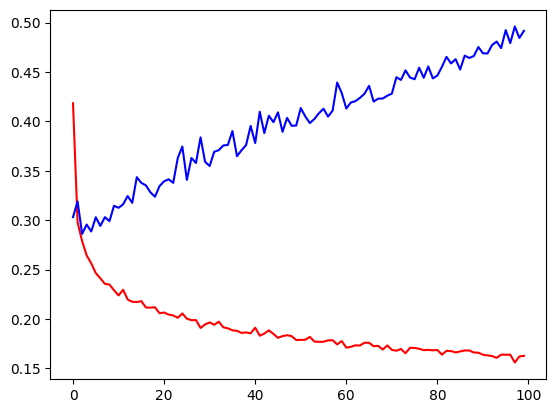

In [14]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],color ='r')
plt.plot(history.history['val_loss'],color ='b')
plt.show() 

In [15]:
#케라스의 조기종료 기능

x_data = df.drop('label', axis=1, inplace=False).values
t_data = df['label'].values  # 원래 one-hot 처리를 해야 해요!
                             # 하지만 keras에게 one-hot처리를 위임할 수
                             # 있어서 따로 처리는 안할꺼예요!
# 정규화는 진행해야 해요!
scaler = MinMaxScaler()
scaler.fit(x_data)
x_data_norm = scaler.transform(x_data)

# train, test 분리
x_data_train_norm, x_data_test_norm, t_data_train, t_data_test = \
train_test_split(x_data_norm,
                 t_data,
                 test_size=0.3,
                 stratify=t_data,
                 random_state=0)

# Model 구현(Regression Model 구현)
model = Sequential()

# Input Layer
model.add(Flatten(input_shape=(784,)))

# Hidden Layer
model.add(Dense(units=256,
                activation='relu'))
model.add(Dense(units=128,
                activation='relu'))

# Output layer
model.add(Dense(units=10,
                activation='softmax'))

model.compile(optimizer=Adam(learning_rate=1e-2),
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

# Early Stopping Callback 설정
from tensorflow.keras.callbacks import EarlyStopping

# monitor : 조기 종료의 기준
# patience : loss값이 중가하는걸 몇번참을것인가에 대한 숫자.
# 1 epoch val_loss : 0.1
# 2 epoch val_loss : 0.05
# 3 epoch val_loss : 0.04
# 4 epoch val_loss : 0.06   - 1번 참자!!
# 5 epoch val_loss : 0.05   - 2번 참자!!
# 6 epoch val_loss : 0.03
es_cb = EarlyStopping(monitor='val_loss',
                      patience=5,
                      restore_best_weights=True)

# model.summary()
# 모델 학습
history = model.fit(x_data_train_norm,
                    t_data_train,
                    epochs=1000,
                    batch_size=100,
                    validation_split=0.2,
                    callbacks=[es_cb],
                    verbose=1)
# 모델 평가
print(model.evaluate(x_data_test_norm,
                     t_data_test))


Epoch 1/1000
236/236 [==============================] - 1s 4ms/step - loss: 0.3084 - acc: 0.9040 - val_loss: 0.2399 - val_acc: 0.9274
Epoch 2/1000
236/236 [==============================] - 1s 4ms/step - loss: 0.1596 - acc: 0.9517 - val_loss: 0.1690 - val_acc: 0.9474
Epoch 3/1000
236/236 [==============================] - 1s 4ms/step - loss: 0.1158 - acc: 0.9633 - val_loss: 0.1476 - val_acc: 0.9571
Epoch 4/1000
236/236 [==============================] - 1s 4ms/step - loss: 0.0956 - acc: 0.9703 - val_loss: 0.1901 - val_acc: 0.9474
Epoch 5/1000
236/236 [==============================] - 1s 3ms/step - loss: 0.0884 - acc: 0.9725 - val_loss: 0.1750 - val_acc: 0.9594
Epoch 6/1000
236/236 [==============================] - 1s 4ms/step - loss: 0.0762 - acc: 0.9769 - val_loss: 0.1647 - val_acc: 0.9641
Epoch 7/1000
236/236 [==============================] - 1s 4ms/step - loss: 0.0948 - acc: 0.9736 - val_loss: 0.1761 - val_acc: 0.9600
Epoch 8/1000
394/394 [==============================] - 1s 2ms